# Naive Bayes Classifier on Car Evaluation Dataset

## Importing Necessary Libraries and Loading the Dataset

In [11]:

import pandas as pd

# Load the dataset
file_path = 'car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv(file_path, header=None, names=columns)
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Preprocessing the Dataset

In [12]:

# Converting categorical data to numerical
car_data_encoded = car_data.copy()
for column in car_data_encoded.columns:
    car_data_encoded[column] = car_data_encoded[column].astype('category').cat.codes

# Splitting the dataset into features (X) and target (y)
X = car_data_encoded.drop('class', axis=1)
y = car_data_encoded['class']

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Implementing Naive Bayes Classifier

In [13]:

import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        self.priors = {}
        self.likelihoods = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]
            self.priors[cls] = len(X_cls) / len(y)
            self.likelihoods[cls] = {}
            for column in X.columns:
                self.likelihoods[cls][column] = X_cls[column].value_counts(normalize=True).to_dict()

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            class_probs = {}
            for cls in self.classes:
                prior = self.priors[cls]
                likelihood = np.prod([self.likelihoods[cls][column].get(row[column], 1e-6) for column in X.columns])
                class_probs[cls] = prior * likelihood
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)


## Training and Testing the Model

In [14]:

# Training the model
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = nb_classifier.predict(X_test)

# Calculating accuracy
accuracy = nb_classifier.accuracy(y_test, y_pred)
print(f"Accuracy of the Naive Bayes Classifier: {accuracy * 100:.2f}")


Accuracy of the Naive Bayes Classifier: 81.79


## Visualizing the Accuracy

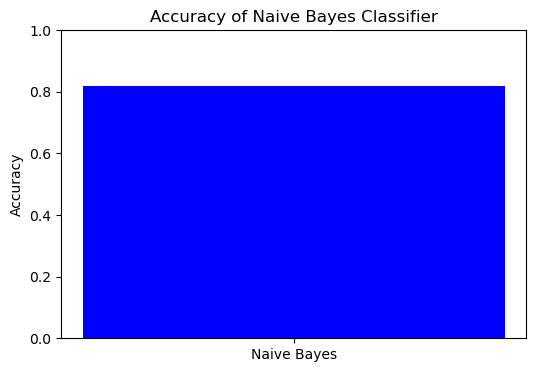

In [15]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['Naive Bayes'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy of Naive Bayes Classifier')
plt.show()
